<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/PSD_histogram_abril_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 7.1MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 115.76 MiB | 33.65 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 71 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (71/71), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     147   80.693878   75.278915  ...  166.213150  160.820877  146.884369
1     193   32.943623   37.320011  ...   40.174419   41.386429   44.162605
2     180    0.385679    2.412840  ...   87.240990   83.783211   81.361488
3     155   90.941437   64.478165  ...   34.592258   36.447289   39.362331
4     170   69.891914   74.885399  ...   31.761524   30.380211   30.144361
5     158   64.016022   68.620087  ...   95.528282  100.581474  109.282639
6     109   30.989813   30.781584  ...   49.405937   47.185333   47.460400
7     113    8.809147    9.987000  ...    2.238938    2.350850    2.545853
8     180   55.400497   56.846920  ...   71.572350   69.038033   53.556545
9     185  133.469086  135.259872  ...   73.800926   68.716843   67.810722
10    156   29.553583   48.671268  ...    5.321499    5.629849    5.666667
11    147  226.387756  197.349213  ...   88.201813   90.714294   90.437653
12    179  102.061111  10

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 71 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (71/71), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
6   135.0   82.308472   84.588081  ...   42.183922   48.425678   55.889378
15  141.0   77.332176   73.970673  ...   90.999756   84.897591   93.619087
18  200.0   70.346794   64.415199  ...   59.788406   80.221207   85.628006
10  142.0   54.466179   57.008533  ...   34.264233   74.571510   87.831581
13  126.0   38.691357   42.296295  ...   72.716049   74.049385   73.234566
33  200.0   56.842003   59.633198  ...   63.698395   56.684803   57.392399
13  116.0   87.705109   83.474434  ...   96.870392   82.510101   87.923897
24  197.0   98.570625   97.653053  ...    3.113273    1.653637    1.118297
29  170.0   87.274887   73.259102  ...   45.929138   44.691490   43.653149
46  160.0    0.733125    0.899375  ...   71.543747   72.357498   71.388748
2   104.0   54.673084   54.465984  ...   95.852081   94.718948   96.486694
4   165.0   73.289658   73.672325  ...  140.087387   64.844849   50.089371
21  175.0  104.267181   7

In [13]:
Width=np.array(Width_new)

In [14]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 428 (delta 112), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (428/428), 2.83 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (249/249), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [15]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [16]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [17]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
6,135.0,82.308472,84.588081,87.764442,90.314346,90.201912,88.132233,84.679565,83.004822,91.736618,100.527397,107.393295,112.307327,114.848061,110.970421,103.488220,89.186111,80.277359,82.095413,82.987267,87.613106,88.079056,85.505783,83.110016,71.784904,53.600166,43.021507,40.374046,38.013332,69.257935,77.832420,83.777939,86.418488,88.847298,90.630783,96.150284,101.382332,104.823372,108.072533,113.680267,...,71.389519,70.844765,67.284332,62.169712,58.566746,56.784252,50.529819,45.428696,44.611359,47.570694,53.151821,58.364109,75.005981,75.546112,74.590775,74.024414,77.148804,73.740082,68.235336,67.011520,66.619141,66.290260,64.912697,63.371407,67.183044,68.311493,68.694702,67.673798,67.218323,69.270676,66.910667,60.976952,55.861122,49.056953,40.318462,38.177666,38.929161,42.183922,48.425678,55.889378
15,141.0,77.332176,73.970673,66.070068,43.950760,25.222021,23.054625,35.714352,51.545849,93.269302,109.129669,108.767464,106.047783,102.101654,100.411896,99.869125,101.114738,107.816658,109.359741,105.997284,101.458481,97.872940,93.677887,92.927628,91.761589,91.804344,91.529999,92.230774,94.150703,73.575829,61.197678,36.926865,16.066044,10.632815,11.427645,24.493385,40.278809,85.906700,108.856850,109.775963,...,86.803581,90.546852,95.329659,96.400734,98.289925,99.789749,100.625931,99.883209,98.026459,91.325089,81.384193,80.764297,102.354355,87.016800,48.814045,27.257181,23.615261,28.956642,35.864044,38.008198,39.145111,41.055382,41.135506,41.784771,45.277302,72.672409,91.213425,90.427040,87.503654,89.461304,91.845139,95.138229,100.970276,102.589005,99.601730,98.083588,96.114487,90.999756,84.897591,93.619087
18,200.0,70.346794,64.415199,44.897598,27.142801,34.241600,51.602402,63.986797,66.385597,66.321999,67.583199,70.060799,67.977997,61.641998,59.718399,48.238003,29.762798,26.225603,32.166000,39.192398,40.158798,41.246002,60.579205,73.926796,78.189995,84.837608,88.065994,78.198006,68.532799,68.893196,64.899200,45.783199,29.095997,37.731197,55.451199,63.162395,59.818401,59.564800,60.648003,59.612801,...,44.378799,44.595600,45.962402,44.595200,41.658001,29.951199,25.248402,26.928801,28.753998,32.853996,61.053604,79.407204,103.500793,105.443604,105.798401,102.666397,91.875198,62.223598,49.089600,53.605598,49.540798,44.993198,42.749599,40.897999,41.653999,40.402397,39.925594,39.982796,39.928398,40.450798,39.969200,37.584797,29.527601,25.198799,27.748400,29.105598,34.716000,59.788406,80.221207,85.628006
10,142.0,54.466179,57.008533,74.185486,91.148781,102.049599,99.370361,98.040070,98.659798,99.997025,102.006554,103.780609,105.124390,104.591949,104.985924,104.219406,102.783180,104.589767,107.794693,112.471138,114.056931,111.720695,117.101768,146.810959,150.253922,127.656219,49.582428,26.357269,26.592939,57.014084,55.051777,77.825630,97.877213,106.997437,98.170212,94.730423,97.209282,98.698074,100.572716,102.370163,...,1.817298,1.672882,3.053958,6.676254,13.180718,27.652056,52.374134,64.499107,63.047012,80.805008,92.726250,101.095215,127.233887,133.431458,135.270981,137.135284,135.774857,127.886337,110.596909,18.423130,0.967864,0.109304,0.000000,0.000000,0.000000,0.438802,0.486015,0.500298,0.633406,0.783376,1.354692,3.201944,4.182504,5.701647,11.530252,23.416388,10.690736,34.264233,74.571510,87.831581
13,126.0,38.691357,42.296295,75.160500,85.629639,90.765434,92.938271,89.925926,88.641975,88.074074,86.938278,86.481476,83.864197,80.320984,80.345673,83.259262,83.160492,80.839516,77.851852,74.814812,74.024689,73.123459,74.679008,78.358032,80.283958,80.555557,78.802475,77.320992,65.493828,81.679016,73.086418,68.222221,82.938278,89.604950,91.629623,93.135796,93.283943,91.234566,89.160500,86.382713,...,123.358025,123.530869,118.888901,102.888885,80.839508,78.493835,73.4

In [18]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

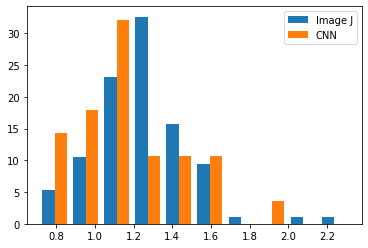

In [19]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.71150074 0.87209458 1.03268843 1.19328227 1.35387612 1.51446996
 1.67506381 1.83565765 1.9962515  2.15684534 2.31743919]
[[ 5.26315789 10.52631579 23.15789474 32.63157895 15.78947368  9.47368421
   1.05263158  0.          1.05263158  1.05263158]
 [14.28571429 17.85714286 32.14285714 10.71428571 10.71428571 10.71428571
   0.          3.57142857  0.          0.        ]]


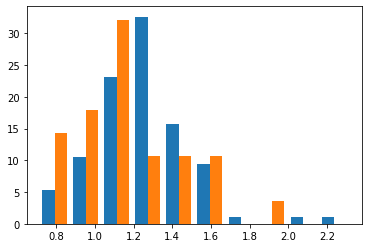

In [20]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [24]:
print(counts.sum())

200.00000000000006


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


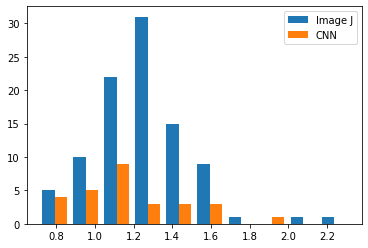

In [21]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [22]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1